In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

In [ ]:
cd ./drive/MyDrive/chest_xray/ 

/content/drive/MyDrive/chest_xray


In [ ]:
import keras
from keras.utils import np_utils
import numpy as np
from numpy import save,load
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation, AvgPool2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import random 
import cv2
import os

In [ ]:
import glob
from tqdm import tqdm


#import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation, AvgPool2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
import random 
import cv2
import os

Displaying Train Data

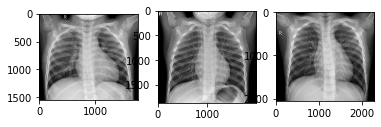

In [ ]:
img_folder=r'train//NORMAL'
for i in range(3):
    file = random.choice(os.listdir(img_folder))#send list
    image_path= os.path.join(img_folder, file)
    img=cv2.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    plt.imshow(img)

Displaying Train Data

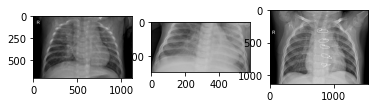

In [ ]:
img_folder=r'train//PNEUMONIA'
for i in range(3):
    file = random.choice(os.listdir(img_folder))#send list
    image_path= os.path.join(img_folder, file)
    img=cv2.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    plt.imshow(img)

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200


**TRAIN IMAGES** npy file read/load data

In [ ]:
# load array
img_data_array = load('traindata.npy')
# print the array
print(img_data_array.shape)

(4764, 200, 200, 3)


**TRAIN LABEL** npy file

In [ ]:
# load array
target_val = load('trainlabel.npy')
# print the array
print(target_val.shape)

(4764,)


**TEST IMAGES** npy file

In [ ]:
# load array
testimg_data_array = load('testdata.npy')
# print the array
print(testimg_data_array.shape)

(624, 200, 200, 3)


**TEST LABEL** npy file

In [ ]:
# load array
test_val = load('testlabel.npy')
# print the array
print(test_val.shape)

(624,)


**VALIDATION IMAGES** npy file

In [ ]:
# load array
validimg_data_array = load('validdata.npy')
# print the array
print(validimg_data_array.shape)

(712, 200, 200, 3)


**VALIDATION LABEL** npy file

In [ ]:
# load array
valid_val = load('validlabel.npy')
# print the array
print(valid_val.shape)

(712,)


**BUILDING MODEL**

In [ ]:
 model = Sequential()
 model.add(Conv2D(42, (3,3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))            #convulational 2D layer 
 model.add(Activation('relu'))                                                   #Activation function RELU
 model.add(MaxPooling2D(pool_size=(2, 2)))                                       #MaxPooling 2D layer

 model.add(Conv2D(42, (3,3)))
 model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
 
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))                                                     #Average Pooling 2D layer
   
model.add(Flatten())                                                          #Flatten Layer
model.add(Dense(32))                                                          #Dense Layer
model.add(Dropout(0.20))                                                      # Dropout 20%
model.add(Dense(1))
model.add(Activation("sigmoid"))                                              #Activation Function Sigmoid





In [ ]:
optim= tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Nadam',
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
batch_size = 50 #batch size of 32 performs the best.
epochs = 60
ext=history = model.fit(img_data_array,np.array(list(map(int,target_val))), epochs=epochs, batch_size=batch_size, validation_data=(validimg_data_array,valid_val))


In [ ]:
model7_yaml = model.to_yaml()
with open("model7.yaml", "w") as yaml_file:
    yaml_file.write(model7_yaml)
    model.save("model7.h5")

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs =range(1,61)
plt.plot(epochs, loss_train, 'g', label='training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('tav7.png')
plt.show()


In [ ]:
#training accuracy
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,61)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy7.png')
plt.show()



LOADING OUR PREVIOUSLY TRAINED MODEL

In [ ]:
model=keras.models.load_model("model8.h5")
model.summary() 


**Loss vs Epochs Graph**

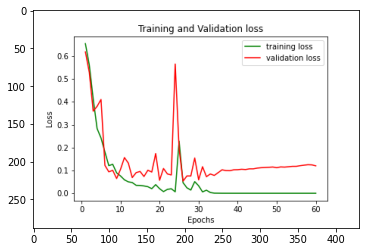

In [ ]:
loss_graph=cv2.imread('tav8.png')
ax=plt.plot()
plt.imshow(loss_graph)

**Accuracy vs Epochs Graph**

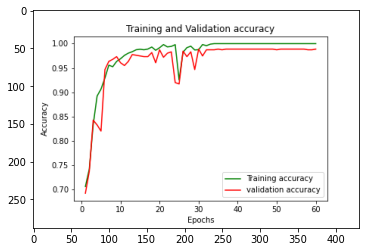

In [ ]:
accuracy_graph=cv2.imread('accuracy8.png')
ax=plt.plot()
plt.imshow(accuracy_graph)

**MODEL VALIDATION** 

In [ ]:
 # predictions
 y_test_pred = model.predict(testimg_data_array)
 y_test_pred=np.asarray(y_test_pred,np.float32)

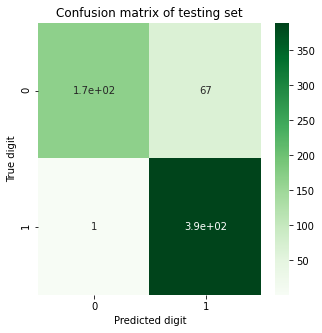

In [ ]:
import sklearn.metrics
cnf_matrix = confusion_matrix(test_val,y_test_pred.round())
labels_array = ['0', '1']
fig, ax = plt.subplots(1,figsize=(5,5))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of testing set')
plt.ylabel('True digit')
plt.xlabel('Predicted digit')
plt.savefig('confusion_matrix00.png')
plt.show();

roc curve

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
yhat_valid = model.predict_classes(testimg_data_array)
print(f'total wrong validation predictions: {np.sum(test_val!= yhat_valid)}\n\n')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_val,yhat_valid)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_val,yhat_valid)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_val,yhat_valid)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_val,yhat_valid)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(test_val,yhat_valid)
print('ROC AUC: %f' % auc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


total wrong validation predictions: 172380


Accuracy: 0.892628
Precision: 0.854945
Recall: 0.997436
F1 score: 0.920710
ROC AUC: 0.857692
